# CST 407 ML - Assignment 1 - part 2

_Code drawn from Chapter 1 – The Machine Learning landscape_


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

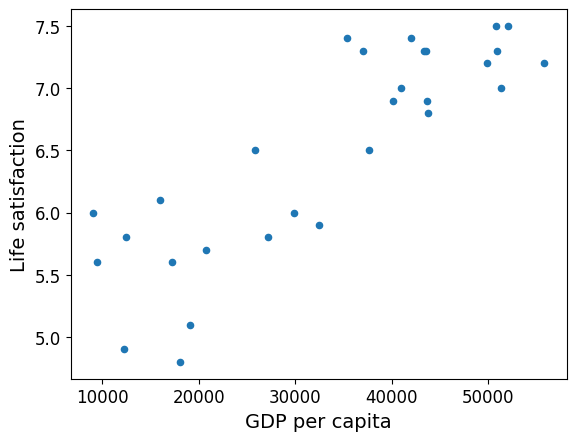

[[5.96242338]]


In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [8]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


# Your turn...

Goal:  Predict life satisfaction based on country attributes (beyond GDP)

Note:  Do not modify the code above for this part.  Instead add code below that adds/modifies results.

Problem 1 Instructions:
1. Visit kaggle.com and explore data sets available for  by country
2. Find and import a data set giving population density per country
3. Evaluate the correlation between population density and life satisfaction
4. Train a model to predict life satisfaction, based on population density 
5. Measure and compare the accuracy of predictions based on population density to those based on GDP
6. Predict the life satisfaction for Cyprus, based on population density
7. How is this result different from the result obtained based on GDP?

Problem 2 Instructions:
1. Train a model to predict life satisfaction, based on both GDP and population density 
2. Measure and compare the accuracy of predictions based on both attributes to those obtained soley based on GDP or population density
3. Predict the life satisfaction for Cyprus, based on both GDP and population density
4. How is this result different from the result obtained soley based on GDP or population density?

Extra Credit:
1. Seek additional country attributes and attempt to achieve a higher accuracy in predicting life satisfaction
2. Explain your approach, results and conclusions

**Problem 1**  

In [9]:
# Data sets for this part of the assignment are provided as separately-submitted files
# The files are used as shown in my code - stored in my local 'Assignment 1 Data' directory

In [10]:
# Data from Kaggle.com : World Population Dataset - Modified from Original
world_pop_dens_df = pd.read_csv("Assignment 1 Data\world_population_mod.csv")

In [11]:
# Uncomment to view the DataFrame
# world_pop_dens_df

In [12]:
# Reduce the size of the Worlld Poopulation Density DataFrame to the columns of interest
Reduced_df = world_pop_dens_df[['Country','2015 Density']]

In [13]:
# Set the index to Country
Reduced_df.set_index('Country', inplace=True)

In [14]:
# Uncomment to view the DataFrame
# Reduced_df

In [15]:
# Merge the Reduced DataFrame with the Country Stats DataFrame
mergedData1_df = pd.merge(Reduced_df, country_stats, on='Country')

In [16]:
# Uncomment to view the DataFrame
# mergedData1_df

In [17]:
# Uncomment to view the DataFrame info
# mergedData1_df.info()

In [18]:
# Correlate population density and life satisfaction
corr_matrix = mergedData1_df.corr(numeric_only=True)
corr_matrix[['2015 Density','Life satisfaction','GDP per capita']].sort_values(by=[], axis=0)


,2015 Density,Life satisfaction,GDP per capita
2015 Density,1.000000,0.044554,0.037672
GDP per capita,0.037672,0.862787,1.000000
Life satisfaction,0.044554,1.000000,0.862787


_"How well do population density and life satisfaction correlate?"_

Population Density and Life Satisfaction do not correlate well.
However, GDP per capita and Life Satisfaction do correlate well.
    

In [19]:
# import the Mean Squared Error library
from sklearn.metrics import mean_squared_error

In [20]:
#

In [21]:
# Life Expectancy vs GDP per capita

In [22]:
# Measure and compare the accuracy of predictions based on Population Density to those based on GDP

In [23]:
# Select the linear Regression model for GDP per capita training
gdp_regres_model = sklearn.linear_model.LinearRegression()

In [24]:
# Train the linear regression model to predict life satisfaction, based on GDP per capita

# Prepare X data for GDP data
X_gdp = np.c_[mergedData1_df['GDP per capita']]
y = np.c_[mergedData1_df["Life satisfaction"]]
# Cyprus GDP per capita from above
Cyprus_gdp = [[22587]]

# Train the linear regression model
gdp_regres_model.fit(X_gdp, y)

LinearRegression()

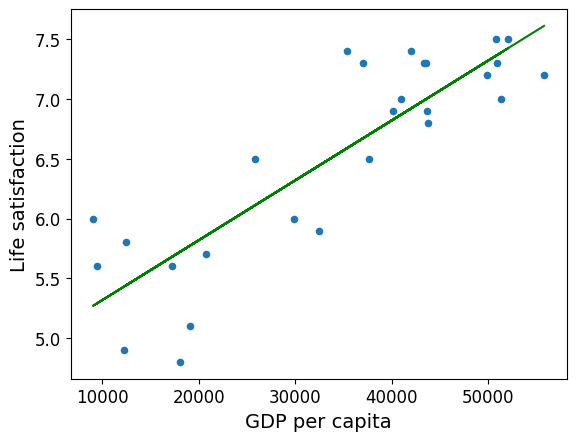

In [25]:
# Show a plot of Life Satisfaction vs GDP per capita with the best fit line
mergedData1_df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.plot(X_gdp, gdp_regres_model.intercept_ + gdp_regres_model.coef_*X_gdp, color="green")
plt.show()

In [26]:
# Predict the Life Satisfaction in Cyprus based on GDP per capita
print("The prediction for Life Satisfaction in Cyprus based on GDP per capita is:")
print(gdp_regres_model.predict(Cyprus_gdp))

The prediction for Life Satisfaction in Cyprus based on GDP per capita is:
[[5.94797351]]


In [27]:
# Calulcate the MSE of Life Satisfaction vs GDP per capita using the fitted model predictions
predictions_gdp = gdp_regres_model.predict(X_gdp)
print("The MSE calculated from predictions for Life satisfaction based on GDP per capita is:")
print(mean_squared_error(y, predictions_gdp))

The MSE calculated from predictions for Life satisfaction based on GDP per capita is:
0.18043414017484907


In [28]:
#

In [29]:
# Life Expectancy vs Population Density

In [30]:
# Select the linear Regression model for GDP per capita training
dens_regres_model = sklearn.linear_model.LinearRegression()

In [31]:
# Train the linear regression model to predict life Satisfaction, based on Population Density

# Prepare the X and y data
X_dens = np.c_[mergedData1_df['2015 Density']]
y = np.c_[mergedData1_df["Life satisfaction"]]

# Train the linear regression model
dens_regres_model.fit(X_dens, y)

LinearRegression()

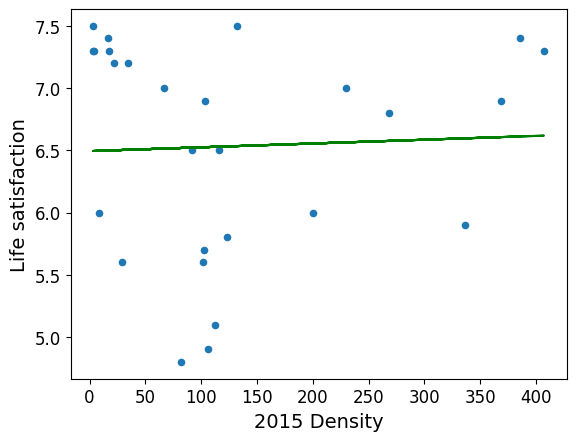

In [32]:
# Show a plot of Life Satisfaction vs Population Density with the best fit line
mergedData1_df.plot(kind='scatter', x='2015 Density', y='Life satisfaction')
plt.plot(X_dens, dens_regres_model.intercept_ + dens_regres_model.coef_*X_dens, color="green")
plt.show()

In [33]:
# Access the World Population data set to get the Population Density data for Cyprus
filt = (world_pop_dens_df['Country'] == 'Cyprus')
Cyprus_dens = [[world_pop_dens_df.loc[filt, '2015 Density'].values[0]]]

In [34]:
# Predict the Life Satisfaction in Cyprus based on Population Density
print("The prediction for Life Satisfaction in Cyprus based on Population Density is:")
print(dens_regres_model.predict(Cyprus_dens))
print()

The prediction for Life Satisfaction in Cyprus based on Population Density is:
[[6.53328267]]



In [35]:
# Calulcate the MSE of Life Satisfaction vs Population Density using the fitted model predictions
predictions_dens = dens_regres_model.predict(X_dens)
print("The MSE calculated from predictions for Life satisfaction based on Population Density is:")
print(mean_squared_error(y, predictions_dens))

The MSE calculated from predictions for Life satisfaction based on Population Density is:
0.7045246427573899


_"How is this result different from the result obtained based on GDP?"_
    
The MSE for 2015 Population Density vs Life Satisfaction is quite high, and this is understandable due high degree of
deviation from the best fit.

The MSE for GDP per capita vs Life Satisfaction is reasonably lower, since the deviation from the best fit is less.    

**Problem 2**

In [36]:
# Select the linear Regression model for GDP per capita and Population Density training
gdp_dens_regres_model = sklearn.linear_model.LinearRegression()

In [37]:
# Prepare the new X data containing both GDP and population density
X_gdp_dens = np.c_[mergedData1_df[['GDP per capita','2015 Density']]]
y = np.c_[mergedData1_df["Life satisfaction"]]

In [38]:
# Train the linear regression model to predict life Satisfaction, based on both GDP per capita and Population Density
gdp_dens_regres_model.fit(X_gdp_dens, y)

LinearRegression()

In [39]:
# Show a plot of Life Satisfaction vs both GDP per capita and Population Density with the Best Fit Plane

In [40]:
# Install the required libraries
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# scikit- spatial has been installed in my environment using pip install scikit-spatial
from skspatial.objects import Points
from skspatial.plotting import plot_3d
from skspatial.objects import Plane
from mpl_toolkits.mplot3d import Axes3D

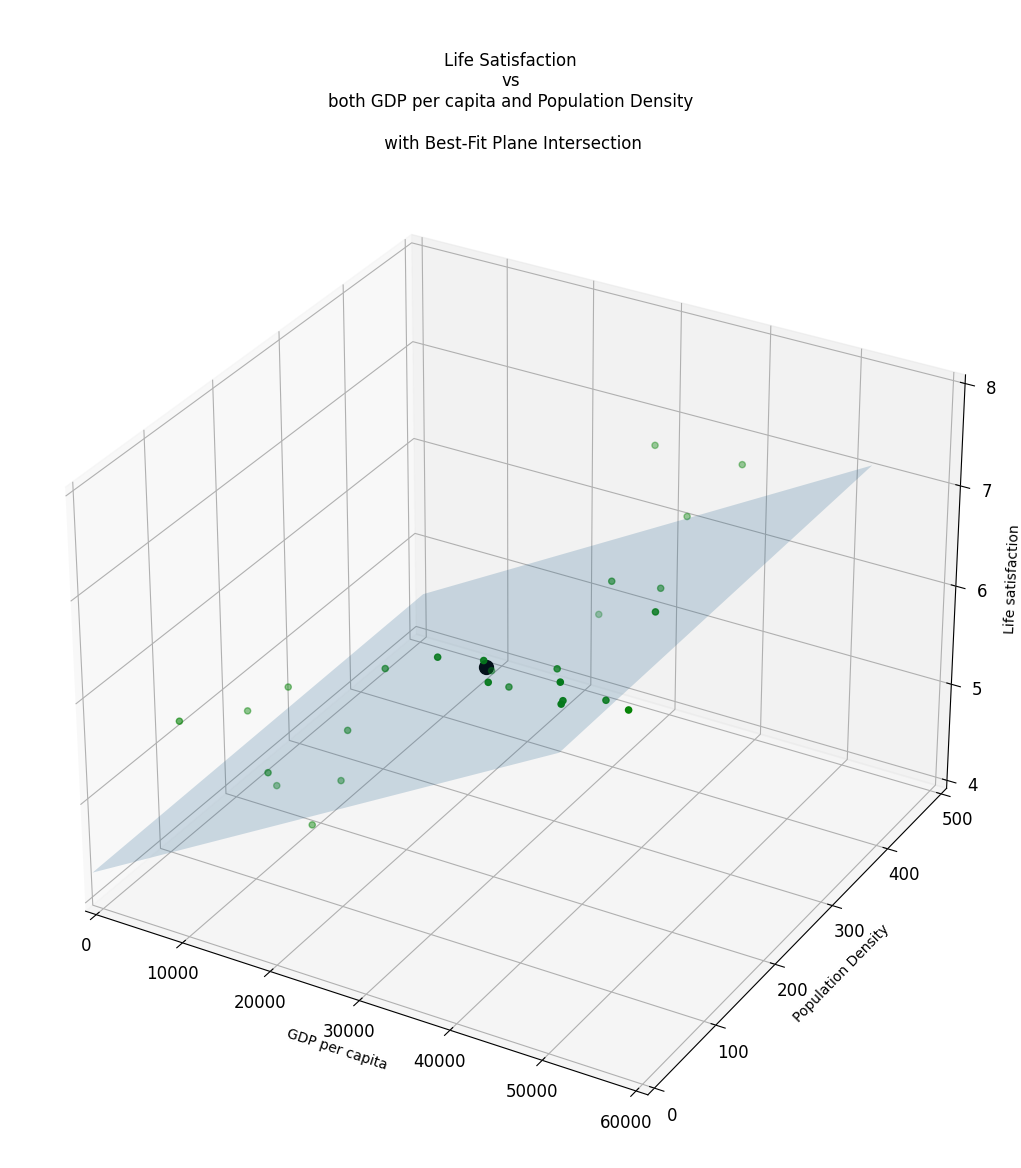

In [41]:
# all of this needs to be in one cell, or it won't work plot everything together

# set up the Axis3D tool
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, and z lit data from the DataFrame
x_list_gdp = np.c_[mergedData1_df['GDP per capita']]
y_list_dens = np.c_[mergedData1_df['2015 Density']]
z_list_lifesat = np.c_[mergedData1_df['Life satisfaction']]

# set axis tick marks as reqired
# x and y tick marks OK with default
# ax.set_xticks([0,10000,20000,30000,40000,50000])
# ax.set_yticks([0,100,200,300,400,500])
# need to customize z tick marks  - default doesn't look right
ax.set_zticks([4,5,6,7,8])

# set axis limits
ax.axes.set_xlim3d(left=0.0, right=60000.0)
ax.axes.set_ylim3d(bottom=0.0, top=500.0)
ax.axes.set_zlim3d(bottom=4.0, top=8.0)

# plot the data within a 3D scatter plot
ax.scatter(x_list_gdp, y_list_dens, z_list_lifesat, c='g', marker='o')

# title the graph
ax.set_title("\n\nLife Satisfaction\nvs\nboth GDP per capita and Population Density\n\n with Best-Fit Plane Intersection")

# label each axis
ax.set_xlabel('GDP per capita', fontsize=10)
ax.set_ylabel('Population Density', fontsize=10)
ax.set_zlabel('Life satisfaction', fontsize=10)

# Prepare points for the plane and the lane by best fit
points = Points(np.column_stack((x_list_gdp, y_list_dens, z_list_lifesat)))
plane = Plane.best_fit(points)

# show the best fit plane
# note, limits are +/- from origin (center of plane)
plane.plot_3d(ax, alpha=0.2, lims_x=(-25000, 25000), lims_y=(-250, 250))
# The point (larger black dot) on the plane is the origin
plane.point.plot_3d(ax, s=100, color="black")

# display the chart
plt.show()

In [42]:
# Predict the life satisfaction for Cyprus, based on both GDP per capita and population density

In [43]:
# Access the World Population data set to get the Population Density data for Cyprus
filt = (world_pop_dens_df['Country'] == 'Cyprus')
Cyprus_dens = world_pop_dens_df.loc[filt, '2015 Density'].values[0]

In [44]:
# Prepare the data with GDP and Population Density for Cyprus
# GDP data from above
X_Cyprus = [[22587,Cyprus_dens]]
X_gdp_dens = np.c_[mergedData1_df[['GDP per capita','2015 Density']]]
y = np.c_[mergedData1_df["Life satisfaction"]]

In [45]:
print("The prediction for Life satisfaction in Cyprus based on both GDP and Population Density is:")
print(gdp_dens_regres_model.predict(X_Cyprus))

The prediction for Life satisfaction in Cyprus based on both GDP and Population Density is:
[[5.94826822]]


In [46]:
# Measure and compare the accuracy of predictions
# based on both attributes to those obtained soley based on GDP or population density

In [47]:
# calulcate the MSE of Life Satisfaction vs both GDP per capita and Population Density using the fitted model predictions
predictions_gdp_dens = gdp_dens_regres_model.predict(X_gdp_dens)
mse_gdp_dens = mean_squared_error(y, predictions_gdp_dens)

print("The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Population Density is:")
mse_gdp_dens

The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Population Density is:


0.18033148506423308

**Extra Credit**

In [48]:
# your code here; feel free to add additional cells as needed

In [49]:
#

In [50]:
# APPROACH #1
# Investigate a possible relationship between CO2 emissions and Quality of Life parameters,
# and then use any high correlation results as a figure of merit in choosing potentially promising
# Quality of Life parameters for the modeling.

In [51]:
# Data from Kaggle.com : Impact of CO2 on Quality of Life around the World - Modified from Original

# Read in the Country CO2 emissions data and the Quality of Life data from the two files provided in
CO2_data_df = pd.read_csv("Assignment 1 Data\CO2_cleaned_2020_reduced_mod.csv")
QOL_data_df = pd.read_csv("Assignment 1 Data\QoL_Classes.csv")

In [52]:
# Reduce the size of the Country CO2 and Quality of Life DataFrames to the columns of interest
Country_CO2_df = CO2_data_df[['Country','CO2 emission (Tons)']]
Country_QOL_df = QOL_data_df[['Country','Stability(15%)','Rights(20%)','Health(15%)','Safety(10%)',\
                              'Climate(15%)','Costs(15%)','Popularity(10%)','TotalQuality of life(100%)']]

In [53]:
# Set the index in the Country_CO2_df and Country_QOL_df DataFrames to "Country"
Country_CO2_df.set_index('Country', inplace=True)
Country_QOL_df.set_index('Country', inplace=True)

In [54]:
# Merge the CO2 and Quality of Life DataFrames
CO2_QOL_merged_df = pd.merge(Country_CO2_df, Country_QOL_df, on='Country')

In [55]:
# Merge the CO2/Quality of Life DataFrame with the country_stats data frame from the previous exercise above.
CO2_QOL_Stats_merged_df = pd.merge(CO2_QOL_merged_df, country_stats, on='Country')

In [56]:
# Show the final CO2, Quality of Life, country stats DataFrame
# CO2_QOL_Stats_merged_df

In [57]:
# Correlate population density and life satisfaction
corr_matrix = CO2_QOL_Stats_merged_df.corr(numeric_only=True)
corr_matrix[['CO2 emission (Tons)','Stability(15%)','Rights(20%)','Health(15%)','Safety(10%)',\
             'Climate(15%)','Costs(15%)','Popularity(10%)','TotalQuality of life(100%)',\
             'Life satisfaction']].sort_values(by=[], axis=0)

,CO2 emission (Tons),Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%),Life satisfaction
CO2 emission (Tons),1.000000,-0.162418,0.017305,-0.299854,-0.300793,0.178917,-0.107986,0.373183,0.077385,0.161125
Stability(15%),-0.162418,1.000000,0.872865,0.499076,0.754869,-0.484723,-0.440070,-0.387266,0.591023,0.415296
Rights(20%),0.017305,0.872865,1.000000,0.414359,0.625661,-0.527076,-0.574682,-0.384594,0.523839,0.731260
Health(15%),-0.299854,0.499076,0.414359,1.000000,0.404089,-0.097937,-0.386248,-0.174487,0.561895,0.135302
Safety(10%),-0.300793,0.754869,0.625661,0.404089,1.000000,-0.407230,-0.284642,-0.195063,0.480449,0.302463
Climate(15%),0.178917,-0.484723,-0.527076,-0.097937,-0.407230,1.000000,-0.055093,0.243970,0.308075,-0.314162
Costs(15%),-0.107986,-0.440070,-0.574682,-0.386248,-0.284642,-0.055093,1.000000,0.073448,-0.454204,-0.534867
Popularity(10%),0.373183,-0.387266,-0.384594,-0.174487,-0.195063,0.243970,0.073448,1.000000,0.017335,-0.125762
TotalQuality of life(100%),0.077385,0.591023,0.523839,0.561895,0.480449,0.308075,-0.454204,0.017335,1.000000,0.306656
GDP per capita,0.318449,0.524145,0.772795,0.241804,0.372373,-0.309808,-0.670592,-0.110741,0.378565,0.879657


In [58]:
# The above data shows a rather high correlation with Life Satisfaction and Rights(20%)
# I will try predicting Life Expectancy with Rights(20%) and combined with GDp per capita
# to see those combined will improve the prediction over other combinations

In [59]:
#

In [60]:
# Explore Predictions for Life Expectancy based on Rights(20%) alone

In [61]:
# Select the linear Regression model for Rights(20%) training
rights_regres_model = sklearn.linear_model.LinearRegression()

In [62]:
# Prepare the X data containing Rights(20%)
X_rights = np.c_[CO2_QOL_Stats_merged_df['Rights(20%)']]
y = np.c_[CO2_QOL_Stats_merged_df["Life satisfaction"]]

In [63]:
# Train the linear regression model to predict Life Satisfaction based on Rights(20%) alone
rights_regres_model.fit(X_rights, y)

LinearRegression()

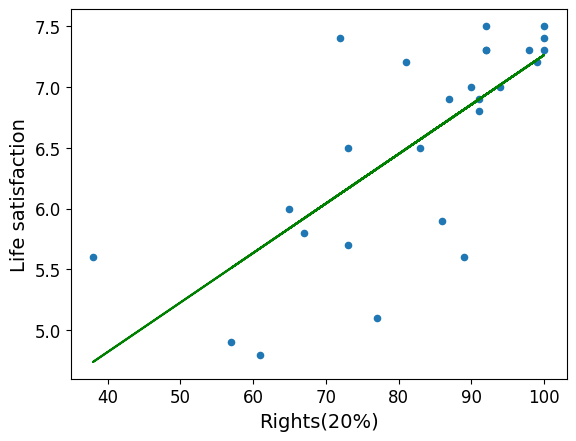

In [64]:
# Show a plot of Life Satisfaction vs Rights(20%) with the best fit line
CO2_QOL_Stats_merged_df.plot(kind='scatter', x='Rights(20%)', y='Life satisfaction')
plt.plot(X_rights, rights_regres_model.intercept_ + rights_regres_model.coef_*X_rights, color="green")
plt.show()

In [65]:
# Read in Cyprus' Rights(20%)
filt = (CO2_data_df['Country'] == 'Cyprus')
Cyprus_rights = [[QOL_data_df.loc[filt, 'Rights(20%)'].values[0]]]

In [66]:
# Predict the Life Satisfaction in Cyprus based on Rights(20%)
print("The prediction for Life Satisfaction in Cyprus based on Rights(20%) is:")
print(rights_regres_model.predict(Cyprus_rights),'\n')

The prediction for Life Satisfaction in Cyprus based on Rights(20%) is:
[[6.81338646]] 



In [67]:
# calulcate the MSE of Life Satisfaction vs Rights(20%) using the fitted model predictions
predictions_rights = rights_regres_model.predict(X_rights)
mse_rights = mean_squared_error(y, predictions_rights)

print("The MSE calculated from predictions for Life satisfaction based on Rights(20%) is:")
mse_rights

The MSE calculated from predictions for Life satisfaction based on Rights(20%) is:


0.33578508059879536

In [68]:
#

In [69]:
# Explore Predictions for Life Expectancy by Combining GDP per Capita and Rights(20%)

In [70]:
# Select the linear Regression model for both GDP per capita and Rights(20%) training
gdp_rights_regres_model = sklearn.linear_model.LinearRegression()

In [71]:
# Prepare the new X data containing both GDP and Rights(20%)
X_gdp_rights = np.c_[CO2_QOL_Stats_merged_df[['GDP per capita','Rights(20%)']]]
y = np.c_[CO2_QOL_Stats_merged_df["Life satisfaction"]]

In [72]:
# Train the linear regression model to predict life Satisfaction, based on both GDP per capita and Rights(20%)
gdp_rights_regres_model.fit(X_gdp_rights, y)

LinearRegression()

In [73]:
# Show a plot of Life Satisfaction vs both GDP per capita and Fights(%) with the best fit plane

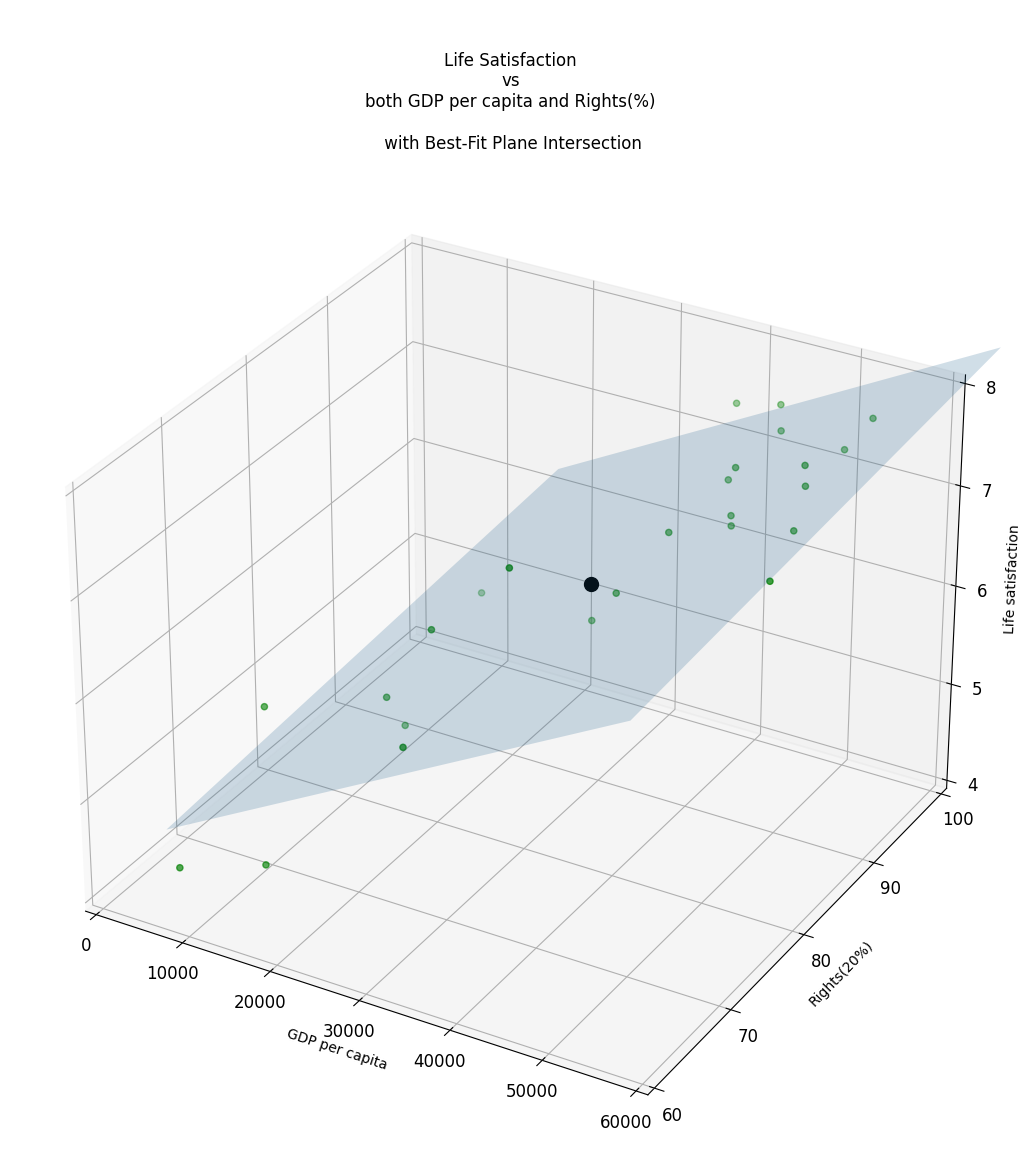

In [74]:
# all of this needs to be in one cell, or it won't work plot everything together

# set up the Axis3D tool (same as previous 3D plot)
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, and z lit data from the DataFrame
x_list_gdp = np.c_[CO2_QOL_Stats_merged_df['GDP per capita']]
y_list_rights = np.c_[CO2_QOL_Stats_merged_df['Rights(20%)']]
z_list_lifesat = np.c_[CO2_QOL_Stats_merged_df['Life satisfaction']]

# set axis tick marks as reqired
# x and y tick marks OK with default
# ax.set_xticks([0,10000,20000,30000,40000,50000])
# need to customize y and z tick marks  - defaults don't look right
ax.set_yticks([60,70,80,90,100])
ax.set_zticks([4,5,6,7,8])

# set axis limits
ax.axes.set_xlim3d(left=0.0, right=60000.0)
ax.axes.set_ylim3d(bottom=60.0, top=100.0)
ax.axes.set_zlim3d(bottom=4.0, top=8.0)

# plot the data within a 3D scatter plot
ax.scatter(x_list_gdp, y_list_rights, z_list_lifesat, c='g', marker='o')

# title the graph
ax.set_title("\n\nLife Satisfaction\nvs\nboth GDP per capita and Rights(%)\n\n with Best-Fit Plane Intersection")

# label each axis
ax.set_xlabel('GDP per capita', fontsize=10)
ax.set_ylabel('Rights(20%)', fontsize=10)
ax.set_zlabel('Life satisfaction', fontsize=10)

# Prepare points for the plane and the plane by best fit
points = Points(np.column_stack((x_list_gdp, y_list_rights, z_list_lifesat)))
plane = Plane.best_fit(points)

# show the best fit plane
# note, limits are +/- from origin (center of plane)
plane.plot_3d(ax, alpha=0.2, lims_x=(-25000, 25000), lims_y=(-25, 25))
# The point (larger black dot) on the plane is the origin
plane.point.plot_3d(ax, s=100, color="black")

# display the chart
plt.show()

In [75]:
# Predict the Life Satisfaction in Cyprus based on both GDP and Rights(20%)

In [76]:
# Prepare the data with GDP and Rights(20%) for Cyprus
# Assign GDP per capita data as used for previous comparisons above
Cyprus_gdp = 22587
# Assign Cyprus' Rights(20%) from ECO DataFrame
filt = (CO2_data_df['Country'] == 'Cyprus')
Cyprus_rights = QOL_data_df.loc[filt, 'Rights(20%)'].values[0]
X_Cyprus = [[Cyprus_gdp,Cyprus_rights]]

In [77]:
# Calculate a prediction for Life Satisfaction in Cyprus based on both GDP per capita and Rights(20%)
# using the linear regression model
print("The prediction for Life Satisfaction in Cyprus based on both GDP per capita and Rights(20%) is:")
print(gdp_rights_regres_model.predict(X_Cyprus))

The prediction for Life Satisfaction in Cyprus based on both GDP per capita and Rights(20%) is:
[[5.99335481]]


In [78]:
# calulcate the MSE of Life Satisfaction vs both GDP per capita and Rights(20%)
# using the fitted model predictions
predictions_gdp_rights = gdp_rights_regres_model.predict(X_gdp_rights)
mse_gdp_rights = mean_squared_error(y, predictions_gdp_rights)

print("The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Rights(20%) is:")
mse_gdp_rights

The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Rights(20%) is:


0.15850836508962005

In [79]:
# ...

In [80]:
# APPROACH #2
# Investigate "Economic Freedom" parameters looking for any high correlation results.

In [81]:
# Data from Kaggle.com : The Economic Freedom Index - Modified from Original

# Read in the "The Economic Freedom Index" file.
# Notice the encoding parameter required to avoid errors when reading the file - I'm not sure why
ECO_data_df = pd.read_csv("Assignment 1 Data\economic_freedom_index2019_data_mod.csv",  encoding = "ISO-8859-1")

In [82]:
# Uncomment to view the DataFrame
# ECO_data_df

In [83]:
# Reduce the size of the Economic Freedom DataFrame to the columns of interest
ECO_Reduced_df = ECO_data_df[['Country','Property Rights','Judical Effectiveness','Government Integrity',\
                              'Population (Millions)','5 Year GDP Growth Rate (%)','Unemployment (%)','Inflation (%)']]

In [84]:
# Set the index in the ECO_Reduced_df DataFrame to "Country"
ECO_Reduced_df.set_index('Country', inplace=True)

In [85]:
# Merge the ECO_Reduced_df and country_stats DataFrames
ECO_Stats_merged_df = pd.merge(ECO_Reduced_df, country_stats, on='Country')

In [86]:
# Uncomment to view the DataFrame
# ECO_Stats_merged_df

In [87]:
# Correlate population density and life satisfaction
corr_matrix = ECO_Stats_merged_df.corr(numeric_only=True)
corr_matrix[['Property Rights','Judical Effectiveness','Government Integrity','Population (Millions)',\
             '5 Year GDP Growth Rate (%)','Unemployment (%)','Inflation (%)','GDP per capita',\
             'Life satisfaction']].sort_values(by=[], axis=0)

,Property Rights,Judical Effectiveness,Government Integrity,Population (Millions),5 Year GDP Growth Rate (%),Unemployment (%),Inflation (%),GDP per capita,Life satisfaction
Property Rights,1.000000,0.802375,0.926723,-0.156780,0.114984,-0.469506,-0.417891,0.802465,0.761546
Judical Effectiveness,0.802375,1.000000,0.907320,0.045426,0.013960,-0.393907,-0.207691,0.777828,0.689199
Government Integrity,0.926723,0.907320,1.000000,-0.058186,0.086517,-0.481558,-0.311591,0.835944,0.800624
Population (Millions),-0.156780,0.045426,-0.058186,1.000000,-0.151482,-0.137708,0.176636,0.097683,0.025725
5 Year GDP Growth Rate (%),0.114984,0.013960,0.086517,-0.151482,1.000000,-0.237378,0.238097,0.113793,0.148413
Unemployment (%),-0.469506,-0.393907,-0.481558,-0.137708,-0.237378,1.000000,0.121018,-0.341670,-0.421295
Inflation (%),-0.417891,-0.207691,-0.311591,0.176636,0.238097,0.121018,1.000000,-0.410519,-0.280322
GDP per capita,0.802465,0.777828,0.835944,0.097683,0.113793,-0.341670,-0.410519,1.000000,0.857767
Life satisfaction,0.761546,0.689199,0.800624,0.025725,0.148413,-0.421295,-0.280322,0.857767,1.000000


In [88]:
#

In [89]:
# Explore Predictions for Life Expectancy using Property Rights alone

In [90]:
# Select the linear Regression model for Property Rights training
proprights_regres_model = sklearn.linear_model.LinearRegression()

In [91]:
# Prepare the X data containing Property Rights
X_proprights = np.c_[ECO_Stats_merged_df['Property Rights']]
y = np.c_[ECO_Stats_merged_df["Life satisfaction"]]

In [92]:
# Train the linear regression model to predict Life Satisfaction, based on Property Rights alone
proprights_regres_model.fit(X_proprights, y)

LinearRegression()

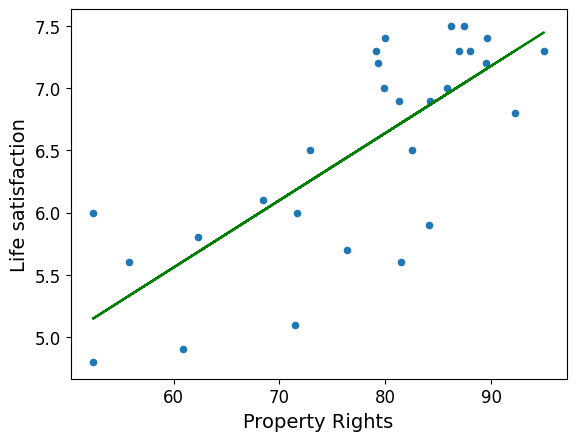

In [93]:
# Show a plot of Life Satisfaction vs Property Rights with the best fit line
ECO_Stats_merged_df.plot(kind='scatter', x='Property Rights', y='Life satisfaction')
plt.plot(X_proprights, proprights_regres_model.intercept_ + proprights_regres_model.coef_*X_proprights, color="green")
plt.show()

In [94]:
# Read in Cyprus' Property Rights
filt = (ECO_data_df['Country'] == 'Cyprus')
Cyprus_proprights = [[ECO_data_df.loc[filt, 'Property Rights'].values[0]]]

In [95]:
# Predict the Life Satisfaction in Cyprus based on Property Rights
print("The prediction for Life Satisfaction in Cyprus based on Property Rights is:")
print(proprights_regres_model.predict(Cyprus_proprights),'\n')

The prediction for Life Satisfaction in Cyprus based on Property Rights is:
[[6.26586599]] 



In [96]:
# calulcate the MSE of Life Satisfaction vs Property Rights using the fitted model predictions
predictions_proprights = proprights_regres_model.predict(X_proprights)
mse_proprights = mean_squared_error(y, predictions_proprights)

print("The MSE calculated from predictions for Life satisfaction based on Property Rights is:")
mse_proprights

The MSE calculated from predictions for Life satisfaction based on Property Rights is:


0.28864935352870397

In [97]:
#

In [98]:
# Explore Predictions for Life Expectancy using Government Integrity alone

In [99]:
# Select the linear Regression model for Government Integrity training
govinteg_regres_model = sklearn.linear_model.LinearRegression()

In [100]:
# Prepare the X data containing Government Integrity
X_govinteg = np.c_[ECO_Stats_merged_df['Government Integrity']]
y = np.c_[ECO_Stats_merged_df["Life satisfaction"]]

In [101]:
# Train the linear regression model to predict Life Satisfaction, based on Government Integrity alone
govinteg_regres_model.fit(X_govinteg, y)

LinearRegression()

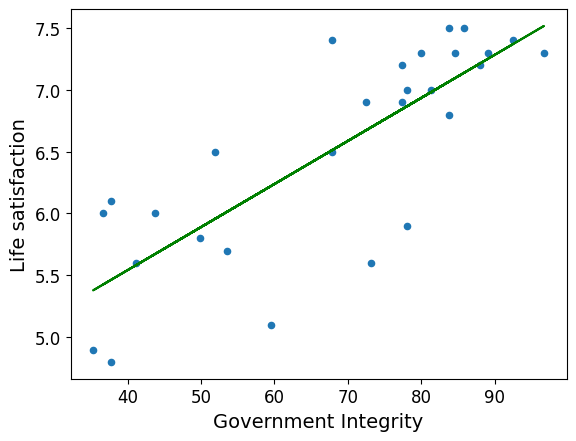

In [102]:
# Show a plot of Life Satisfaction vs Government Integrity with the best fit line
ECO_Stats_merged_df.plot(kind='scatter', x='Government Integrity', y='Life satisfaction')
plt.plot(X_govinteg, govinteg_regres_model.intercept_ + govinteg_regres_model.coef_*X_govinteg, color="green")
plt.show()

In [103]:
# Read in Cyprus' Government Integrity
filt = (ECO_data_df['Country'] == 'Cyprus')
Cyprus_govinteg = [[ECO_data_df.loc[filt, 'Government Integrity'].values[0]]]

In [104]:
# Predict the Life Satisfaction in Cyprus based on Government Integrity
print("The prediction for Life Satisfaction in Cyprus based on Governemnt Integrity is:")
print(govinteg_regres_model.predict(Cyprus_govinteg),'\n')

The prediction for Life Satisfaction in Cyprus based on Governemnt Integrity is:
[[5.67086084]] 



In [105]:
# calulcate the MSE of Life Satisfaction vs Governemnt Integrity using the fitted model predictions
predictions_govinteg = govinteg_regres_model.predict(X_govinteg)
mse_govinteg = mean_squared_error(y, predictions_govinteg)

print("The MSE calculated from predictions for Life satisfaction based on Government Integrity is:")
mse_govinteg

The MSE calculated from predictions for Life satisfaction based on Government Integrity is:


0.24669889720084906

In [106]:
#

In [107]:
# Explore Predictions for Life Expectancy by Combining GDP per Capita and Government Integrity

In [108]:
# Select the linear Regression model for both GDP per capita and Government Integrity training
gdp_govinteg_regres_model = sklearn.linear_model.LinearRegression()

In [109]:
# Prepare the new X data containing both GDP and Government Integrity
X_gdp_govinteg = np.c_[ECO_Stats_merged_df[['GDP per capita','Government Integrity']]]
y = np.c_[ECO_Stats_merged_df["Life satisfaction"]]

In [110]:
# Train the linear regression model to predict life Satisfaction, based on both GDP per capita and Government Integrity
gdp_govinteg_regres_model.fit(X_gdp_govinteg, y)

LinearRegression()

In [111]:
# Predict the Life Satisfaction in Cyprus based on both GDP and Government Integrity

In [112]:
# Prepare the data with GDP and Government Integrity for Cyprus
# Assign GDP per capita data as used for previous comparisons above
Cyprus_gdp = 22587
# Assign Cyprus' Government Integrity from ECO DataFrame
filt = (ECO_data_df['Country'] == 'Cyprus')
Cyprus_govinteg = ECO_data_df.loc[filt, 'Government Integrity'].values[0]
X_Cyprus = [[Cyprus_gdp,Cyprus_govinteg]]

In [113]:
# Calculate a prediction for Life Satisfaction in Cyprus based on both GDP per capita and Government Integrity
# using the linear regression model
print("The prediction for Life Satisfaction in Cyprus based on Governemnt Integrity is:")
print(gdp_govinteg_regres_model.predict(X_Cyprus))

The prediction for Life Satisfaction in Cyprus based on Governemnt Integrity is:
[[5.8325592]]


In [114]:
# calulcate the MSE of Life Satisfaction vs both GDP per capita and Governemnt Integrity
# using the fitted model predictions
predictions_gdp_govinteg = gdp_govinteg_regres_model.predict(X_gdp_govinteg)
mse_gdp_govinteg = mean_squared_error(y, predictions_gdp_govinteg)

print("The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Government Integrity is:")
mse_gdp_govinteg

The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Government Integrity is:


0.1656408258559459

In [115]:
#

In [116]:
# Explore Predictions for Life Expectancy by Combining GDP per Capita and Proiperty Rights

In [117]:
# Select the linear Regression model for both GDP per capita and Property Rights training
gdp_proprights_regres_model = sklearn.linear_model.LinearRegression()

In [118]:
# Prepare the new X data containing both GDP per capita and Property Rights
X_gdp_proprights = np.c_[ECO_Stats_merged_df[['GDP per capita','Property Rights']]]
y = np.c_[ECO_Stats_merged_df["Life satisfaction"]]

In [119]:
# Train the linear regression model to predict life Satisfaction, based on both GDP per capita and Property Rights
gdp_proprights_regres_model.fit(X_gdp_proprights, y)

LinearRegression()

In [120]:
# Predict the Life Satisfaction in Cyprus based on both GDP per capita and Property Rights

In [121]:
# Prepare the data with GDP per capita and Property Rights for Cyprus
# Assign GDP per capita data as used for previous comparisons above
Cyprus_gdp = 22587
# Assign Cyprus' Property Rights from ECO DataFrame
filt = (ECO_data_df['Country'] == 'Cyprus')
Cyprus_proprights = ECO_data_df.loc[filt, 'Property Rights'].values[0]
X_Cyprus = [[Cyprus_gdp,Cyprus_proprights]]

In [122]:
# Calculate a prediction for Life Satisfaction in Cyprus based on both GDP per capita and Property Rights
# using the linear regression model
print("The prediction for Life Satisfaction in Cyprus based on both GDP per capita and Property Rights is:")
print(gdp_proprights_regres_model.predict(X_Cyprus))

The prediction for Life Satisfaction in Cyprus based on both GDP per capita and Property Rights is:
[[6.01616839]]


In [123]:
# calulcate the MSE of Life Satisfaction vs both GDP per capita and Property Rights
# using the fitted model predictions
predictions_gdp_proprights = gdp_proprights_regres_model.predict(X_gdp_proprights)
mse_gdp_proprights = mean_squared_error(y, predictions_gdp_proprights)

print("The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Property Rights is:")
mse_gdp_proprights

The MSE calculated from predictions for Life satisfaction based on both GDP per capita and Property Rights is:


0.17123155239617047

In [124]:
#

In [125]:
# Explore Predictions for Life Expectancy by Combining GDP per Capita, Government Integrity and Property Rights

In [126]:
# Select the linear Regression model for all three GDP per capita, Government Integrity, and Property Rights training
gdp_govinteg_proprights_regres_model = sklearn.linear_model.LinearRegression()

In [127]:
# Prepare the new X data containing all three GDP per capita, Government Integrity, and Property Rights
X_gdp_govinteg_proprights = np.c_[ECO_Stats_merged_df[['GDP per capita','Government Integrity','Property Rights']]]
y = np.c_[ECO_Stats_merged_df["Life satisfaction"]]

In [128]:
# Train the linear regression model to predict life Satisfaction, based on all three GDP per capita, Government Integrity,
# and Property Rights
gdp_govinteg_proprights_regres_model.fit(X_gdp_govinteg_proprights, y)

LinearRegression()

In [129]:
# Predict the Life Satisfaction in Cyprus based on all three GDP per capita, Government Integreity, and Property Rights

In [130]:
# Prepare the data with GDP per capita, Government Integrity, and Property Rights for Cyprus
# Assign GDP per capita data as used for previous comparisons above
Cyprus_gdp = 22587
# Assign Cyprus' Government Integrity and Property Rights from ECO DataFrame
filt = (ECO_data_df['Country'] == 'Cyprus')
Cyprus_govinteg = ECO_data_df.loc[filt, 'Government Integrity'].values[0]
Cyprus_proprights = ECO_data_df.loc[filt, 'Property Rights'].values[0]
X_Cyprus = [[Cyprus_gdp,Cyprus_govinteg,Cyprus_proprights]]

In [131]:
# Calculate a prediction for Life Satisfaction in Cyprus based all three GDP per capita, Government Integrity,
# and Property Rights using the linear regression model
print("The prediction for Life Satisfaction in Cyprus based on Property Rights is:")
print(gdp_govinteg_proprights_regres_model.predict(X_Cyprus))

The prediction for Life Satisfaction in Cyprus based on Property Rights is:
[[5.84251791]]


In [132]:
# calulcate the MSE of Life Satisfaction vs all three GDP per capita, Government Integrity, and Property Rights
# using the fitted model predictions
predictions_gdp_govinteg_proprights = gdp_govinteg_proprights_regres_model.predict(X_gdp_govinteg_proprights)
mse_gdp_govinteg_proprights = mean_squared_error(y, predictions_gdp_govinteg_proprights)

print("The MSE calculated from predictions for Life satisfaction based on all three GDP per capita, Government Integrity, and Property Rights is:")
mse_gdp_govinteg_proprights

The MSE calculated from predictions for Life satisfaction based on all three GDP per capita, Government Integrity, and Property Rights is:


0.1656166929705598